# Aproko Doctor Tweets Analysis

Aproko Doctor, an Executive Director of The100kclub, a Medical Doctor, and Amaka's hypeman, is one of my Twitter influencers. Actor, perfume collector, author, and ICFJ Knight
In this research, I used phantombuster, an automated technique, to extract tweets from Dr. Chininso Egemba (@aproko doctor) on Twitter. His tweets were analyzed, a sentimental analysis was done, and a word cloud was created to display the most often appearing term in his tweets.

importing neccessary libraries

In [2]:
import pandas as pd
import seaborn as sn
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
matplotlib.rcParams["figure.figsize"] = (12, 8)

#wordcloud
from PIL import Image
import numpy
from wordcloud import WordCloud

#NLP Summarizer
import nltk
from sumy.parsers.plaintext import PlaintextParser
from sumy.summarizers.lsa import LsaSummarizer
from sumy.nlp.tokenizers import Tokenizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words

#Sentimental Analysis
from textblob import TextBlob

importing dataset

In [3]:
tweets =  pd.read_csv(r"C:\Users\lolad\Desktop\Aproko Doctor\Dataset\Aproko Doctor Tweets.csv", encoding='cp437')
tweets

,twitterId,Date,Month,Day,time,daytime,text,mediaUrl
0,308269557,Jul-31,Jul,Sun,20:01:00,Evening,Guy! You've come a long way! See photos na!,NaN
1,308269557,Jul-31,Jul,Sun,19:57:00,Evening,Deji na my personal person... so we move!,NaN
2,308269557,Jul-31,Jul,Sun,19:43:00,Evening,RT @DENRELE_EDUN: U're a National Treasure &am...,NaN
3,308269557,Jul-31,Jul,Sun,16:25:00,Afternoon,This guy @DENRELE_EDUN is a case ://t.co/c96Xz...,NaN
4,308269557,Jul-31,Jul,Sun,14:39:00,Afternoon,"RT @adewumihaas001: Guys, I got more than quad...",NaN
...,...,...,...,...,...,...,...,...
665,308269557,Oct-01,Oct,Sat,08:47:00,Morning,RT @FeedforLife12: Every Nigerian child has a ...,NaN
666,308269557,Oct-01,Oct,Sat,07:18:00,Morning,If you see a lot of people drinking water on s...,NaN
667,308269557,Oct-01,Oct,Sat,06:58:00,Early-Morning,Update for October don show. ://t.co/lQbWpbzHzN,NaN
668,308269557,Oct-01,Oct,Sat,06:23:00,Early-Morning,Happy new month my people!\nMay our labour not...,NaN


In [9]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   twitterId  670 non-null    int64 
 1   Date       670 non-null    object
 2   Month      670 non-null    object
 3   Day        670 non-null    object
 4   time       670 non-null    object
 5   daytime    670 non-null    object
 6   text       670 non-null    object
 7   mediaUrl   64 non-null     object
dtypes: int64(1), object(7)
memory usage: 42.0+ KB


Total number of Tweets

In [4]:
tweetcount = tweets["text"].count()
tweetcount

670

This visualization shows that @aproko_doctor (Dr. Chininso Egemba) had 670 tweets in 3 months and 5 days (Wed 06-Jul-2022 to Tue 11-Oct-2022).

Classifications

In [15]:
tt = tweets[tweets["text"].str.contains("RT") == False]
tt = tt["text"].count()
rt = tweets[tweets["text"].str.contains("RT")]
rt = rt["text"].count()
data = [["Written Tweets", tt], ["Retweets", rt]]
tweet_type = pd.DataFrame(data , columns = ["tweet type", "count"])
tweet_type

,tweet type,count
0,Written Tweets,444
1,Retweets,226


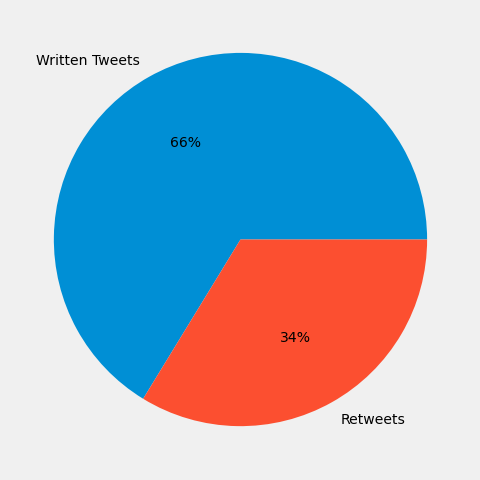

In [16]:
plt.pie(x = tweet_type["count"], labels = tweet_type["tweet type"], autopct = "%0.f%%")
plt.show()

According to this visualization, 66% (444) of Dr.'s tweets are original tweets, while 34% (226) of them are retweets.

# Tweet Count by day of the week

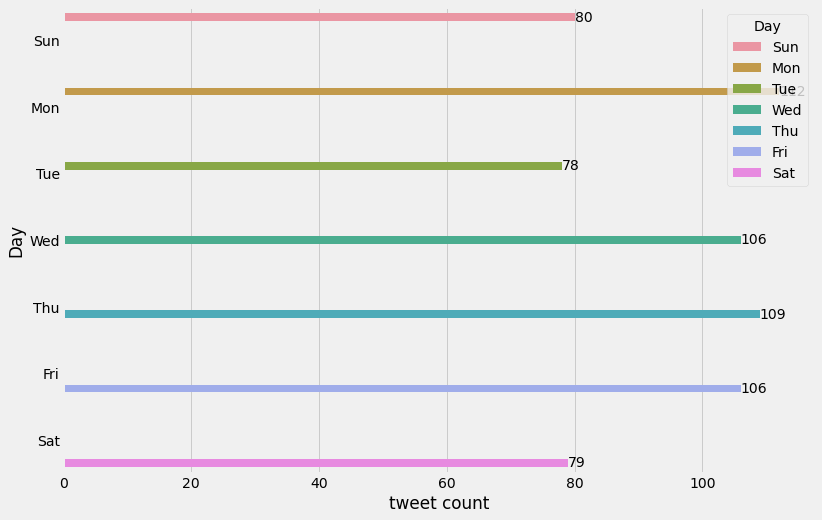

In [17]:
day_tweet = tweets[["Day", "text"]].groupby("Day")["text"].count()
day_tweet = day_tweet.to_frame().reset_index()
day_tweet["Day"] = pd.Categorical(day_tweet["Day"], ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"])
day_tweet = day_tweet.sort_values("Day")
day_tweet = day_tweet.rename(columns = {"text":"tweet count"})
ax = sn.barplot(x = "tweet count", y = "Day", data = day_tweet, hue = "Day")
for i in ax.containers:
    plt.bar_label(i, )

According to this visualization, Dr.'s tweet the most during the week and the least over the weekend, with Monday having the greatest tweet counts.

Tweet by daytime

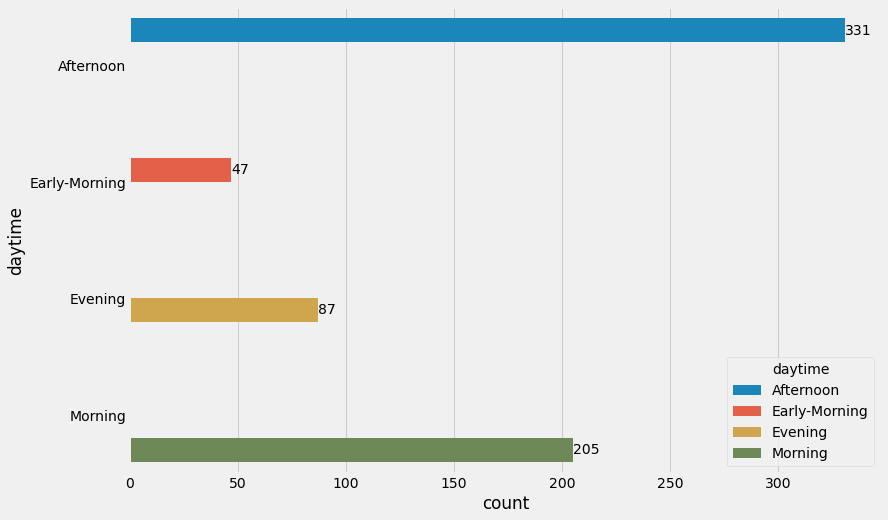

In [5]:
daytime_tweets = tweets[["daytime", "text"]].groupby("daytime")["text"].count()
daytime_tweets = daytime_tweets.to_frame().reset_index()
daytime_tweets = daytime_tweets.rename(columns = {"text":"count"})
ax = sn.barplot(x = "count", y = "daytime", data = daytime_tweets, hue = "daytime")
for i in ax.containers:
    plt.bar_label(i, )

My visualization reveals that Dr. tweets more in the afternoon and least in the early morning.

# Sentimental Analysis

In [29]:
def getSubjectivity(tweets):
    return TextBlob(tweets).sentiment.subjectivity
def getPolarity(tweets):
    return TextBlob(tweets).sentiment.polarity

tweets["subjectivity"] = tweets["text"].apply(getSubjectivity)
tweets["polarity"] = tweets["text"].apply(getPolarity)

In [30]:
tweets

,twitterId,Date,Month,Day,time,daytime,text,mediaUrl,subjectivity,polarity
0,308269557,Jul-31,Jul,Sun,20:01:00,Evening,Guy! You've come a long way! See photos na!,NaN,0.400000,-0.078125
1,308269557,Jul-31,Jul,Sun,19:57:00,Evening,Deji na my personal person... so we move!,NaN,0.300000,0.000000
2,308269557,Jul-31,Jul,Sun,19:43:00,Evening,RT @DENRELE_EDUN: U're a National Treasure &am...,NaN,0.200000,-0.156250
3,308269557,Jul-31,Jul,Sun,16:25:00,Afternoon,This guy @DENRELE_EDUN is a case ://t.co/c96Xz...,NaN,0.000000,0.000000
4,308269557,Jul-31,Jul,Sun,14:39:00,Afternoon,"RT @adewumihaas001: Guys, I got more than quad...",NaN,0.500000,0.500000
...,...,...,...,...,...,...,...,...,...,...
665,308269557,Oct-01,Oct,Sat,08:47:00,Morning,RT @FeedforLife12: Every Nigerian child has a ...,NaN,0.386905,0.261905
666,308269557,Oct-01,Oct,Sat,07:18:00,Morning,If you see a lot of people drinking water on s...,NaN,0.000000,0.000000
667,308269557,Oct-01,Oct,Sat,06:58:00,Early-Morning,Update for October don show. ://t.co/lQbWpbzHzN,NaN,0.000000,0.000000
668,308269557,Oct-01,Oct,Sat,06:23:00,Early-Morning,Happy new month my people!\nMay our labour not...,NaN,0.727273,0.485227


In [32]:
def rev(polarity):
    if polarity > 0:
        return "positive"
    elif polarity < 0:
        return "negative"
    else:
        return "neutral"
    
tweets["sentiment"] = tweets["polarity"].apply(rev)

In [33]:
tweets

,twitterId,Date,Month,Day,time,daytime,text,mediaUrl,subjectivity,polarity,sentiment
0,308269557,Jul-31,Jul,Sun,20:01:00,Evening,Guy! You've come a long way! See photos na!,NaN,0.400000,-0.078125,negative
1,308269557,Jul-31,Jul,Sun,19:57:00,Evening,Deji na my personal person... so we move!,NaN,0.300000,0.000000,neutral
2,308269557,Jul-31,Jul,Sun,19:43:00,Evening,RT @DENRELE_EDUN: U're a National Treasure &am...,NaN,0.200000,-0.156250,negative
3,308269557,Jul-31,Jul,Sun,16:25:00,Afternoon,This guy @DENRELE_EDUN is a case ://t.co/c96Xz...,NaN,0.000000,0.000000,neutral
4,308269557,Jul-31,Jul,Sun,14:39:00,Afternoon,"RT @adewumihaas001: Guys, I got more than quad...",NaN,0.500000,0.500000,positive
...,...,...,...,...,...,...,...,...,...,...,...
665,308269557,Oct-01,Oct,Sat,08:47:00,Morning,RT @FeedforLife12: Every Nigerian child has a ...,NaN,0.386905,0.261905,positive
666,308269557,Oct-01,Oct,Sat,07:18:00,Morning,If you see a lot of people drinking water on s...,NaN,0.000000,0.000000,neutral
667,308269557,Oct-01,Oct,Sat,06:58:00,Early-Morning,Update for October don show. ://t.co/lQbWpbzHzN,NaN,0.000000,0.000000,neutral
668,308269557,Oct-01,Oct,Sat,06:23:00,Early-Morning,Happy new month my people!\nMay our labour not...,NaN,0.727273,0.485227,positive


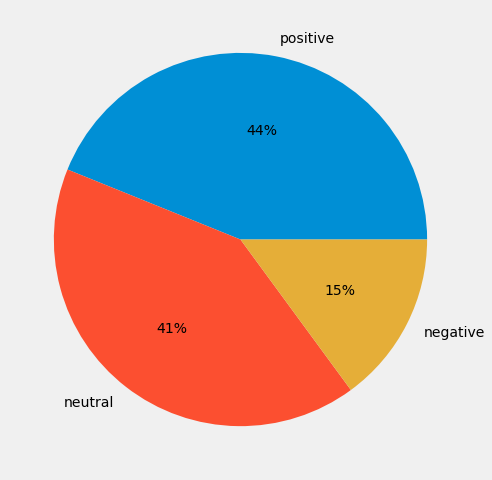

In [35]:
sentiment = tweets["sentiment"].value_counts().to_frame().reset_index()
sentiment = sentiment.rename(columns = {"sentiment":"count", "index":"sentiment"})
plt.pie(x = sentiment["count"], labels = sentiment["sentiment"], autopct = "%0.f%%")
plt.show()

# Word Cloud

In [38]:
#Removing Stopwords
stopwords = list(get_stop_words("english"))

#Creating my own stopwords
custom_stop_words = ["https","RT"]

#Adding custom_stop_words to stopwords list
final_stop_words = stopwords + custom_stop_words

#Removing stopwords from the dataset
tweets['text'] = tweets['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (final_stop_words)]))
tweets

,twitterId,Date,Month,Day,time,daytime,text,mediaUrl,subjectivity,polarity,sentiment
0,308269557,Jul-31,Jul,Sun,20:01:00,Evening,Guy! You've long way! See photos na!,NaN,0.400000,-0.078125,negative
1,308269557,Jul-31,Jul,Sun,19:57:00,Evening,Deji na personal person... move!,NaN,0.300000,0.000000,neutral
2,308269557,Jul-31,Jul,Sun,19:43:00,Evening,@DENRELE_EDUN: U're National Treasure &amp; Mo...,NaN,0.200000,-0.156250,negative
3,308269557,Jul-31,Jul,Sun,16:25:00,Afternoon,This guy @DENRELE_EDUN case ://t.co/c96XzdClIU,NaN,0.000000,0.000000,neutral
4,308269557,Jul-31,Jul,Sun,14:39:00,Afternoon,"@adewumihaas001: Guys, I quadruple Instagram f...",NaN,0.500000,0.500000,positive
...,...,...,...,...,...,...,...,...,...,...,...
665,308269557,Oct-01,Oct,Sat,08:47:00,Morning,@FeedforLife12: Every Nigerian child hope futu...,NaN,0.386905,0.261905,positive
666,308269557,Oct-01,Oct,Sat,07:18:00,Morning,"If lot people drinking water statuses posts, v...",NaN,0.000000,0.000000,neutral
667,308269557,Oct-01,Oct,Sat,06:58:00,Early-Morning,Update October don show. ://t.co/lQbWpbzHzN,NaN,0.000000,0.000000,neutral
668,308269557,Oct-01,Oct,Sat,06:23:00,Early-Morning,Happy month people! May labour vain,NaN,0.727273,0.485227,positive


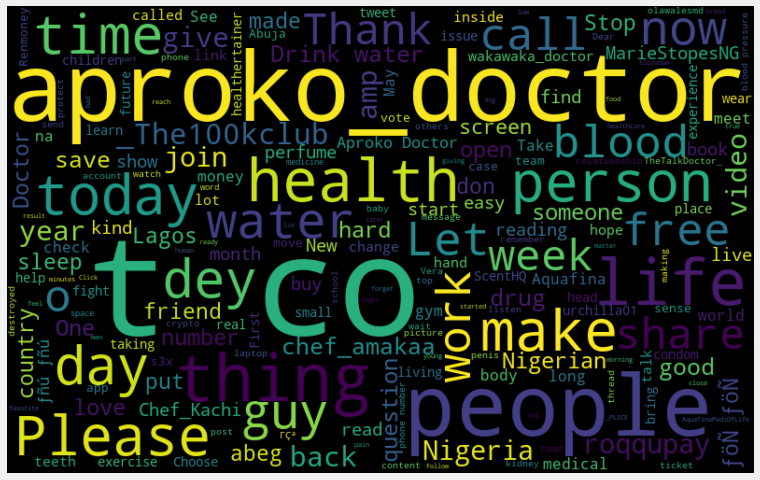

In [39]:
text = " ".join(i for i in tweets.text)
wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 150).generate(text)

plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()